In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Creating the 10 arm bandit environment

In [2]:
# Set the numpy random seed 
np.random.seed(42)

# Number of slot machines
n = 10

# Number of actions. In this case each action corresponds to the pulling the lever for each slot machine
actions = n

# Each slot machine has their hidden weights that determines their average payout.
weights = np.random.rand(n)

# We want to keep track of of the running average of rewards for each action
# We store it as a list of tuples with the tuple's first index being the running average of rewards 
# and second index being the cumulative counts for the given action. 
# The indices of the list corresponds to each action
records = np.zeros((actions, 2))

# Specify the total number of plays 
plays = 500

# We also want to store the running mean reward for each play
rewards = [0]

In [3]:
weights

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [4]:
records

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [5]:
# Let us create a function to choose the best action
def chooseAction():    
    # Return the action with the highest reward  
    return np.argmax(records[:, 0])

In [6]:
# Create a function that returns the payout / reward for a given action weight
def getReward(w, n=10):
    reward = 0
    # Rewards for the slot machines are choosen based on their unique probability dist., 
    # centered on their expected average payout. 
    # We determine the reward from this dist. by executing it multiple time
    for _ in range(n):
        if np.random.random() < w:
            reward += 1
    return reward

In [7]:
# Function to update the reward records
def updateRecords(action ,r):
    # access the global variable
    global records
    # Calculate the new average by multiplying the old average by the count in order to get the old sum.
    # Then add the new reward to the old sum. Divide by the old count + 1
    records[action, 0] = (records[action, 0] * records[action, 1] + r) / (records[action, 1] + 1)
    # Update the old count as well
    records[action, 1] = records[action, 1] + 1

In [8]:
print('The average weights for the slot machines that determine their payouts are:\n{}'.format(weights))

The average weights for the slot machines that determine their payouts are:
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


In [9]:
print("""
The weight for slot machine at index 2 is {}.
The average payout on this machine should be approximately {}.
Let test it my calling the getReward function {} times with the provided action being 2 
corresponding the slot machine 2. The average reward is: {}
""".format(weights[2], np.round(weights[2] * 10), plays, np.mean([getReward(weights[2]) for _ in range(plays)])))


The weight for slot machine at index 2 is 0.7319939418114051.
The average payout on this machine should be approximately 7.0.
Let test it my calling the getReward function 500 times with the provided action being 2 
corresponding the slot machine 2. The average reward is: 7.354



### 10-arm bandit problem

In [10]:
# Playing the 10-arm bandit problem
for i in range(plays):
    actionChoice = chooseAction()    # velg handling med høyest forventet verdi
    reward = getReward(weights[actionChoice])  # hent reward (basert på sanns.fordeling til w)
    
    # oppdaterer records som holder styr på hvor mange ganger en handling er gjort
    # og hvor stor den gjennomsnittlige gevinsten er
    updateRecords(actionChoice, reward)  
    
    # rewards stores the average, convert it to sum add the new reward and recalculate the average
    meanReward = ( (i+1) * rewards[-1] + reward) / (i+2)
    rewards.append(meanReward)

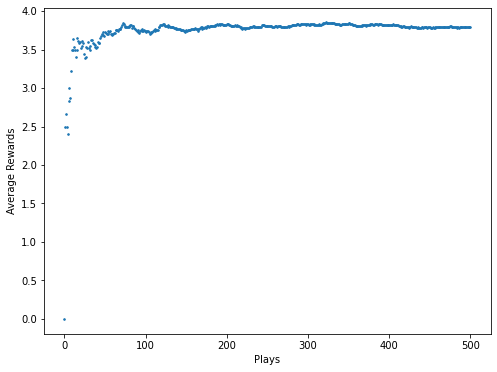

In [11]:
# Let us plot the running average rewards over the plays
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlabel('Plays')
ax.set_ylabel('Average Rewards')
ax.scatter(np.arange(plays+1), rewards, s=2.5)

### 10-arm bandit problem - epsilon greedy strategy

In [47]:
# For epsilon greedy strategy we need to specify the epsilon value
e = 0.2
# Reset the records and rewards variables
records = np.zeros((actions, 2))
# We also want to store the cumulative mean reward for each play
rewards = [0]

In [48]:
# Playing the 10-arm bandit problem
for i in range(plays):
    # Implemending the epsilon stategy
    if np.random.random() > e:
        actionChoice = chooseAction()    
    else:
        actionChoice = np.random.randint(actions)
    reward = getReward(weights[actionChoice])  
    updateRecords(actionChoice, reward)  
    # rewards stores the average, convert it to sum add the new reward and recalculate the average
    meanReward = ( (i+1) * rewards[-1] + reward) / (i+2)
    rewards.append(meanReward)
    
    

Hovedforskjellen fra den over er at denne har et element av tilfeldighet i seg. Dette fører til at algoritmen prøver ut nye handlinger (exploration). Algoritmen ovenfor har kun exploitation, og vil derfor raskt sette seg fast i et suboptimalt handlingsmønster. 

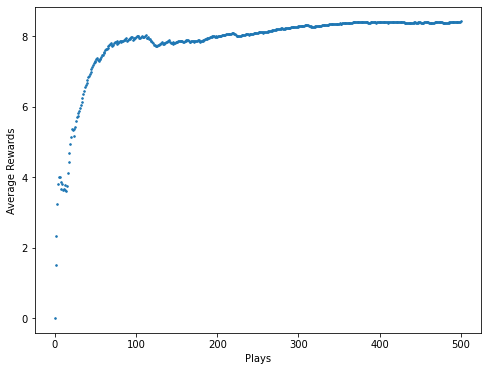

In [49]:
# Let us plot the running average rewards over the plays
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlabel('Plays')
ax.set_ylabel('Average Rewards')
ax.scatter(np.arange(plays+1), rewards, s=2.5)

### 10-arm bandit problem - softmax strategy

In [23]:
# For softmax strategy we need to specify the temperature value
t = 1.2
# Reset the records and rewards variables
records = np.zeros((actions, 2))
# We also want to store the cumulative mean reward for each play
rewards = [0]

In [24]:
# In order to use the softmax strategy we need to implement the softmax function that generates the probability distributions for the actions
def softmax(tau=t):
    # We use records[:, 0] as the 0 index on axis=1 holds the rewards for each action.
    softm = np.exp(records[:, 0] /tau) / np.sum( np.exp(records[:, 0] / tau))
    return softm

In [26]:
# Playing the 10-arm bandit problem
# for i in range(plays):
for i in range(plays):
    # We dont need to chooseAction method, as actions are choosen based on their probability distribution. 
    # During each play, the probability distribution changes based on the histroy of past actions and their respective rewards
    p = softmax()    
    # We can choose the action based on the generated probability distibution
    actionChoice = np.random.choice(actions, p=p)
    reward = getReward(weights[actionChoice])  
    updateRecords(actionChoice, reward)  
    # rewards stores the average, convert it to sum add the new reward and recalculate the average
    meanReward = ( (i+1) * rewards[-1] + reward) / (i+2)
    rewards.append(meanReward)
    
    

Velger handlinger basert på en smartere måte enn ovenfor. Gjennomsnittlig reward mates inn i en softmax funksjon. Handlingene som i gjennomsnitt har høyest reward får dermed høyere sannsynlighet for å bli valgt. Men samtidig bevarer vi et element av exploration ved at f.eks. exp(0) != 0.

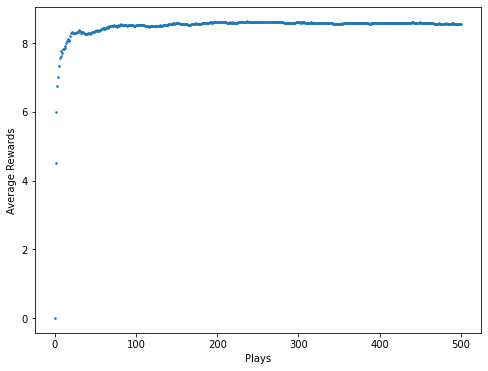

In [27]:
# Let us plot the running average rewards over the plays
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlabel('Plays')
ax.set_ylabel('Average Rewards')
ax.scatter(np.arange(plays+1), rewards, s=2.5)